In [4]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity

In [5]:
# import all image files with the .jpg extension
images = glob.glob ("C:/Users/Jegadit/Downloads/archive/frames/frames/*.jpg")

In [6]:
# Load a list of images into image_data variable
image_data = []
for img in images:
    this_image = cv2.imread(img, 1)
    image_data.append(this_image)

# Image Sizing

In [7]:
for i in range(10):
    print(image_data[i].shape)

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)


# Image Analytics

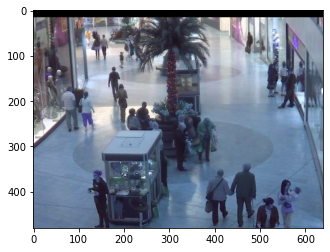

In [8]:
plt.imshow(image_data[0])
plt.show()

## Average of the images

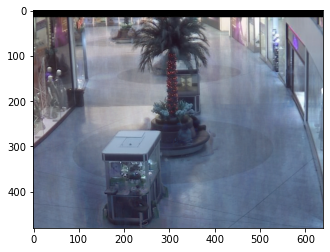

In [9]:
avg_image = image_data[0]
for i in range(len(image_data)):
    if i == 0:
        pass
    else:
        alpha = 1.0/(i + 1)
        beta = 1.0 - alpha
        avg_image = cv2.addWeighted(image_data[i], alpha, avg_image, beta, 0.0)

plt.imshow(avg_image)
plt.show()

In [10]:
# cv2.imwrite('avg.png', avg_image)

# Colour Scheme

In [11]:
# Extract the pixel values for each channel
red_pixels = avg_image[:,:,0].ravel()
green_pixels = avg_image[:,:,1].ravel()
blue_pixels = avg_image[:,:,2].ravel()

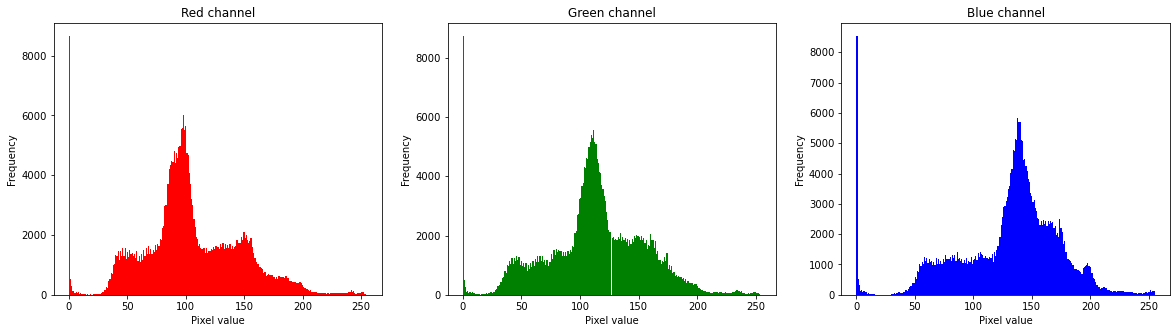

In [12]:
# Plot the histograms
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].hist(red_pixels, bins=256, color='red')
axs[0].set_title('Red channel')
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Frequency')
axs[1].hist(green_pixels, bins=256, color='green')
axs[1].set_title('Green channel')
axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Frequency')
axs[2].hist(blue_pixels, bins=256, color='blue')
axs[2].set_title('Blue channel')
axs[2].set_xlabel('Pixel value')
axs[2].set_ylabel('Frequency')
plt.show()

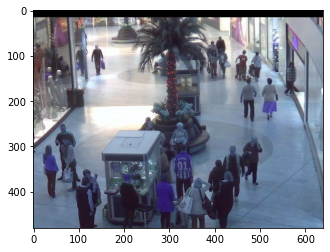

In [13]:
import random

random_img = random.choice(image_data)
plt.imshow(random_img)
plt.show()

In [14]:
red_pixels = random_img[:,:,0].ravel()
green_pixels = random_img[:,:,1].ravel()
blue_pixels = random_img[:,:,2].ravel()

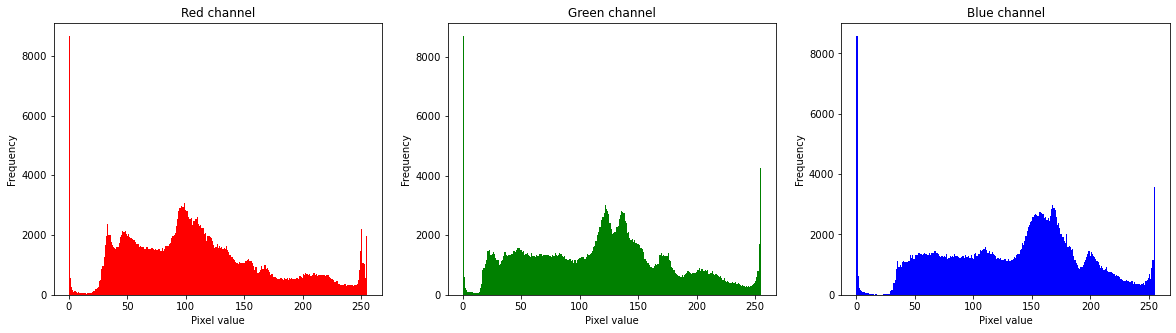

In [15]:
# Plot the histograms
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].hist(red_pixels, bins=256, color='red')
axs[0].set_title('Red channel')
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Frequency')
axs[1].hist(green_pixels, bins=256, color='green')
axs[1].set_title('Green channel')
axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Frequency')
axs[2].hist(blue_pixels, bins=256, color='blue')
axs[2].set_title('Blue channel')
axs[2].set_xlabel('Pixel value')
axs[2].set_ylabel('Frequency')
plt.show()

# B&W, GrayScale

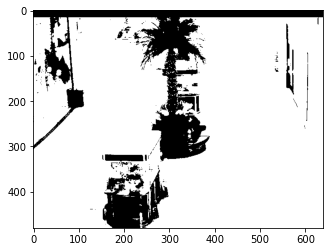

In [16]:
thresh1, image_black1 = cv2.threshold(cv2.cvtColor(avg_image, cv2.COLOR_BGR2GRAY), 75, 250, cv2.THRESH_BINARY)
plt.imshow(image_black1, cmap='gray')
plt.show()

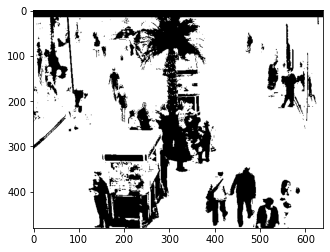

In [17]:
thresh2, image_black2 = cv2.threshold(cv2.cvtColor(image_data[0], cv2.COLOR_BGR2GRAY), 75, 250, cv2.THRESH_BINARY)
plt.imshow(image_black2, cmap='gray')
plt.show()

#### Difference BW Avg image and any image frame

Image Similarity: 84.0846%


[]

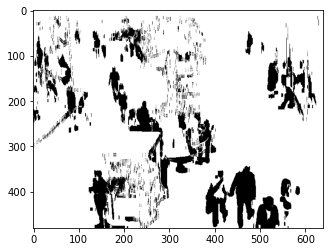

In [18]:
# Load images as grayscale
image1 = image_black1
image2 = image_black2

# Compute SSIM between the two images
score, diff = structural_similarity(image1, image2, full=True, multichannel=True)

diff = (diff * 255).astype("uint8")
print("Image Similarity: {:.4f}%".format(score * 100))

plt.imshow(diff, cmap='gray')
plt.plot()

#### As a function

In [19]:
# as a function
def ImgSimilarityDiff(avg_image, image_data):
    # Load images as grayscale
    thresh1, image_black1 = cv2.threshold(cv2.cvtColor(avg_image, cv2.COLOR_BGR2GRAY), 75, 250, cv2.THRESH_BINARY)
    thresh2, image_black2 = cv2.threshold(cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY), 75, 250, cv2.THRESH_BINARY)

    # Compute SSIM between the two images
    score, diff = structural_similarity(image_black1, image_black2, full=True, multichannel=True)

    diff = (diff * 255).astype("uint8")
    # print("Image Similarity: {:.4f}%".format(score * 100))

    return score, diff

19.756976148453532


[]

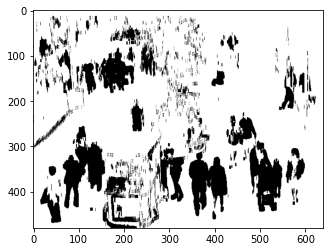

In [20]:
s, d = ImgSimilarityDiff(avg_image, image_data[4])
print(100-(s*100))
plt.imshow(d, cmap='gray')
plt.plot()